# Boston Real Estate Data

Source: https://www.kaggle.com/arslanali4343/real-estate-dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
data = pd.read_csv('real_estate_data.csv')

In [3]:
df = pd.DataFrame(data)

## 1. Exploratory Data Analysis

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df = df[df['RM'].notna()]

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.617404,11.289526,11.174842,0.069170,0.555209,6.287589,68.555731,3.775231,9.531621,408.330040,18.498419,356.228379,12.872569,22.711858
std,8.600123,23.325350,6.824592,0.253994,0.115611,0.703802,28.161573,2.096147,8.716661,168.382685,2.202078,91.253462,7.823528,9.520520
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082268,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.098500,4.000000,280.250000,17.400000,374.687500,6.950000,17.025000
50%,0.266005,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.122200,5.000000,330.000000,19.100000,391.260000,11.465000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629750,93.975000,5.117675,24.000000,666.000000,20.200000,396.210000,17.107500,25.075000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


### Visualization

In [9]:
sns.set_style("darkgrid")

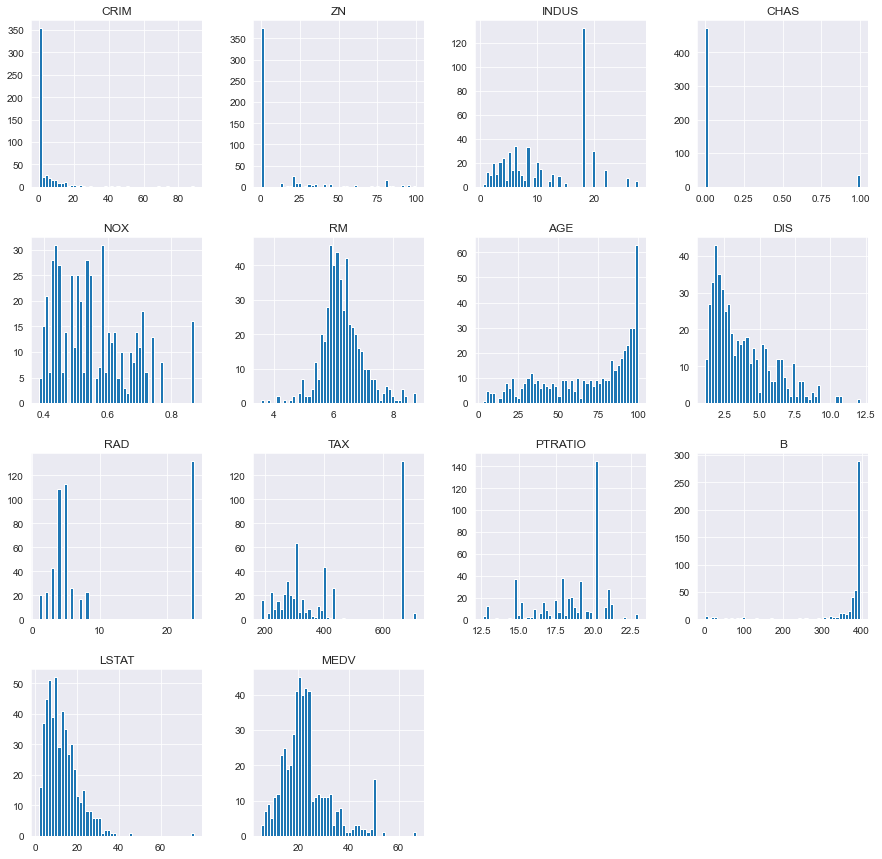

In [10]:
df.hist(bins = 50, figsize=(15,15))
plt.show()

<AxesSubplot:>

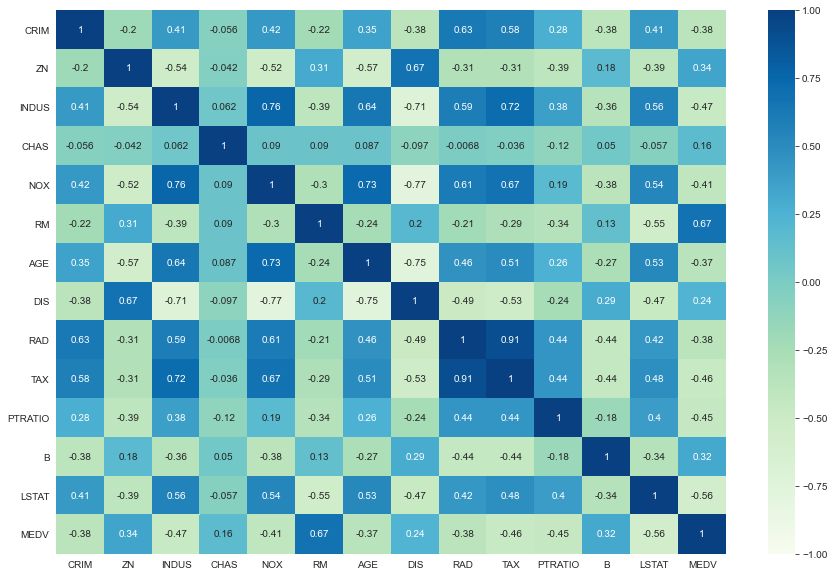

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), 
            annot = True, 
            vmin = -1, 
            vmax = 1, 
            cmap = "GnBu",
            ax = ax)

Now we can watch the behavior of the variables withe most correlation vs the Crime variable

<AxesSubplot:xlabel='AGE', ylabel='CRIM'>

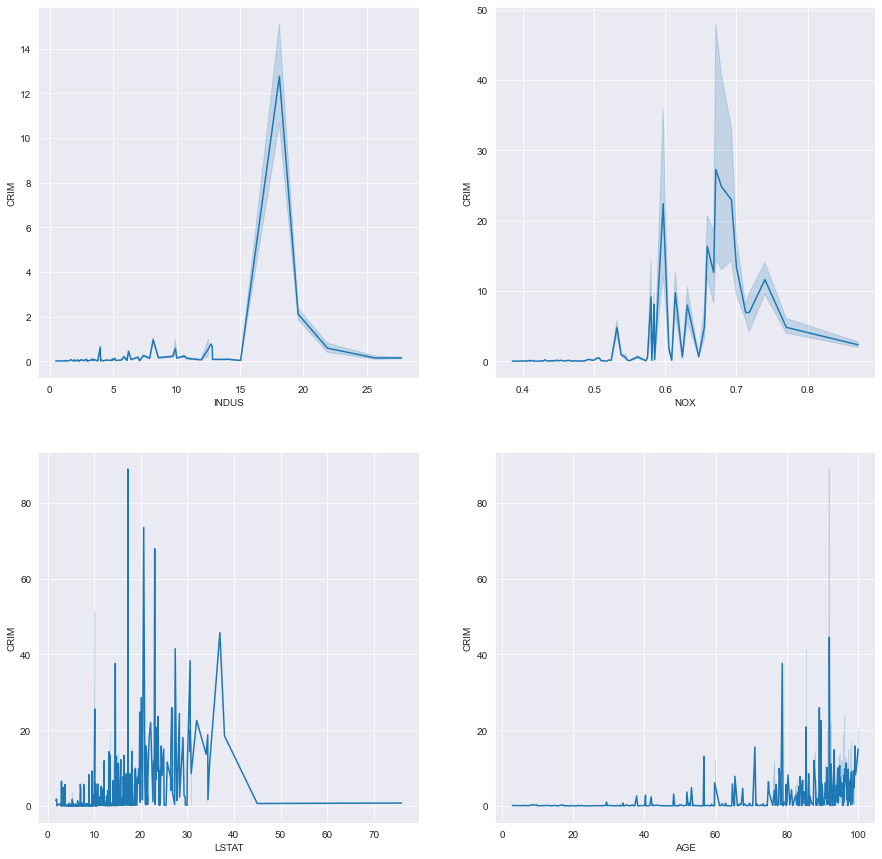

In [12]:
fig, ax = plt.subplots(2,2, figsize = (15,15))

sns.lineplot(x = df['INDUS'], y = df['CRIM'], ax = ax[0,0])
sns.lineplot(x = df['NOX'], y = df['CRIM'], ax = ax[0,1])
sns.lineplot(x = df['LSTAT'], y = df['CRIM'], ax = ax[1,0])
sns.lineplot(x = df['AGE'], y = df['CRIM'], ax = ax[1,1])

<AxesSubplot:xlabel='RAD', ylabel='CRIM'>

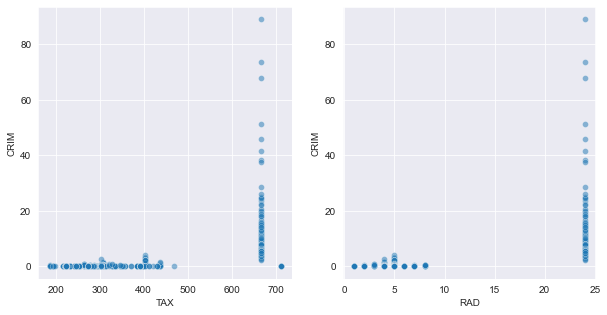

In [13]:
fig, ax=plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x = df['TAX'], 
                y = df['CRIM'],
                alpha = 0.5,
                ax = ax[0])

sns.scatterplot(x = df['RAD'], 
                y = df['CRIM'],
                alpha = 0.5,
                ax = ax[1])

## 2. Model

In [14]:
X = StandardScaler().fit_transform(df.drop(['CRIM'], axis = 1))
Y = StandardScaler().fit_transform(df[['CRIM']])

In [15]:
model = cross_val_predict(LinearRegression(), X, Y)

In [16]:
cross_val_score(LinearRegression(), X, Y, scoring = "neg_mean_squared_error")

array([-0.05745219, -0.12119495, -0.07796011, -1.99221806, -1.44880636])

In [17]:
mean_squared_error(Y, model)

0.7381783599349939